In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 表示の省略設定
pd.options.display.max_rows = 20 

In [3]:
data = pd.read_excel("test_data.xlsx", sheet_name = "data", index_col=0)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.022094,0.028102,0.026919,0.025859,0.027473,0.024401,0.027107,0.025527,0.025987,0.027918,...,0.028944,0.027275,0.020018,0.025823,0.022409,0.028561,0.022966,0.020643,0.025452,0.021240
0.5,0.023874,0.022585,0.025336,0.025548,0.026979,0.027618,0.029465,0.025217,0.021876,0.020705,...,0.028620,0.029640,0.024738,0.020673,0.023524,0.020122,0.020233,0.020212,0.020538,0.024540
1.0,0.027529,0.024983,0.022358,0.020179,0.028245,0.020260,0.023540,0.025129,0.025133,0.020307,...,0.025163,0.024044,0.029097,0.028147,0.029825,0.022852,0.028063,0.027896,0.025068,0.021357
1.5,0.022256,0.020417,0.020645,0.025880,0.020729,0.024840,0.025659,0.028030,0.020233,0.023536,...,0.022878,0.026852,0.026058,0.027617,0.028456,0.029317,0.022232,0.025337,0.029559,0.027707
2.0,0.027772,0.021838,0.024207,0.023373,0.027494,0.020188,0.021591,0.029102,0.027580,0.022068,...,0.025341,0.021594,0.027409,0.021721,0.029164,0.023959,0.025155,0.020761,0.025467,0.023262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.0,0.026608,0.028879,0.020880,0.020216,0.027411,0.027098,0.024759,0.023341,0.027507,0.020423,...,0.027590,0.020093,0.020382,0.026822,0.024992,0.021505,0.022999,0.027080,0.025191,0.029547
22.5,0.028714,0.029963,0.020170,0.028858,0.021560,0.022934,0.028364,0.027425,0.029701,0.025535,...,0.025317,0.024822,0.022508,0.024025,0.020730,0.026771,0.021678,0.023980,0.021273,0.024161
23.0,0.027886,0.028034,0.028547,0.023552,0.029610,0.028057,0.026268,0.021179,0.022224,0.024063,...,0.028693,0.029274,0.021142,0.026810,0.021557,0.024533,0.022788,0.027189,0.029798,0.021487


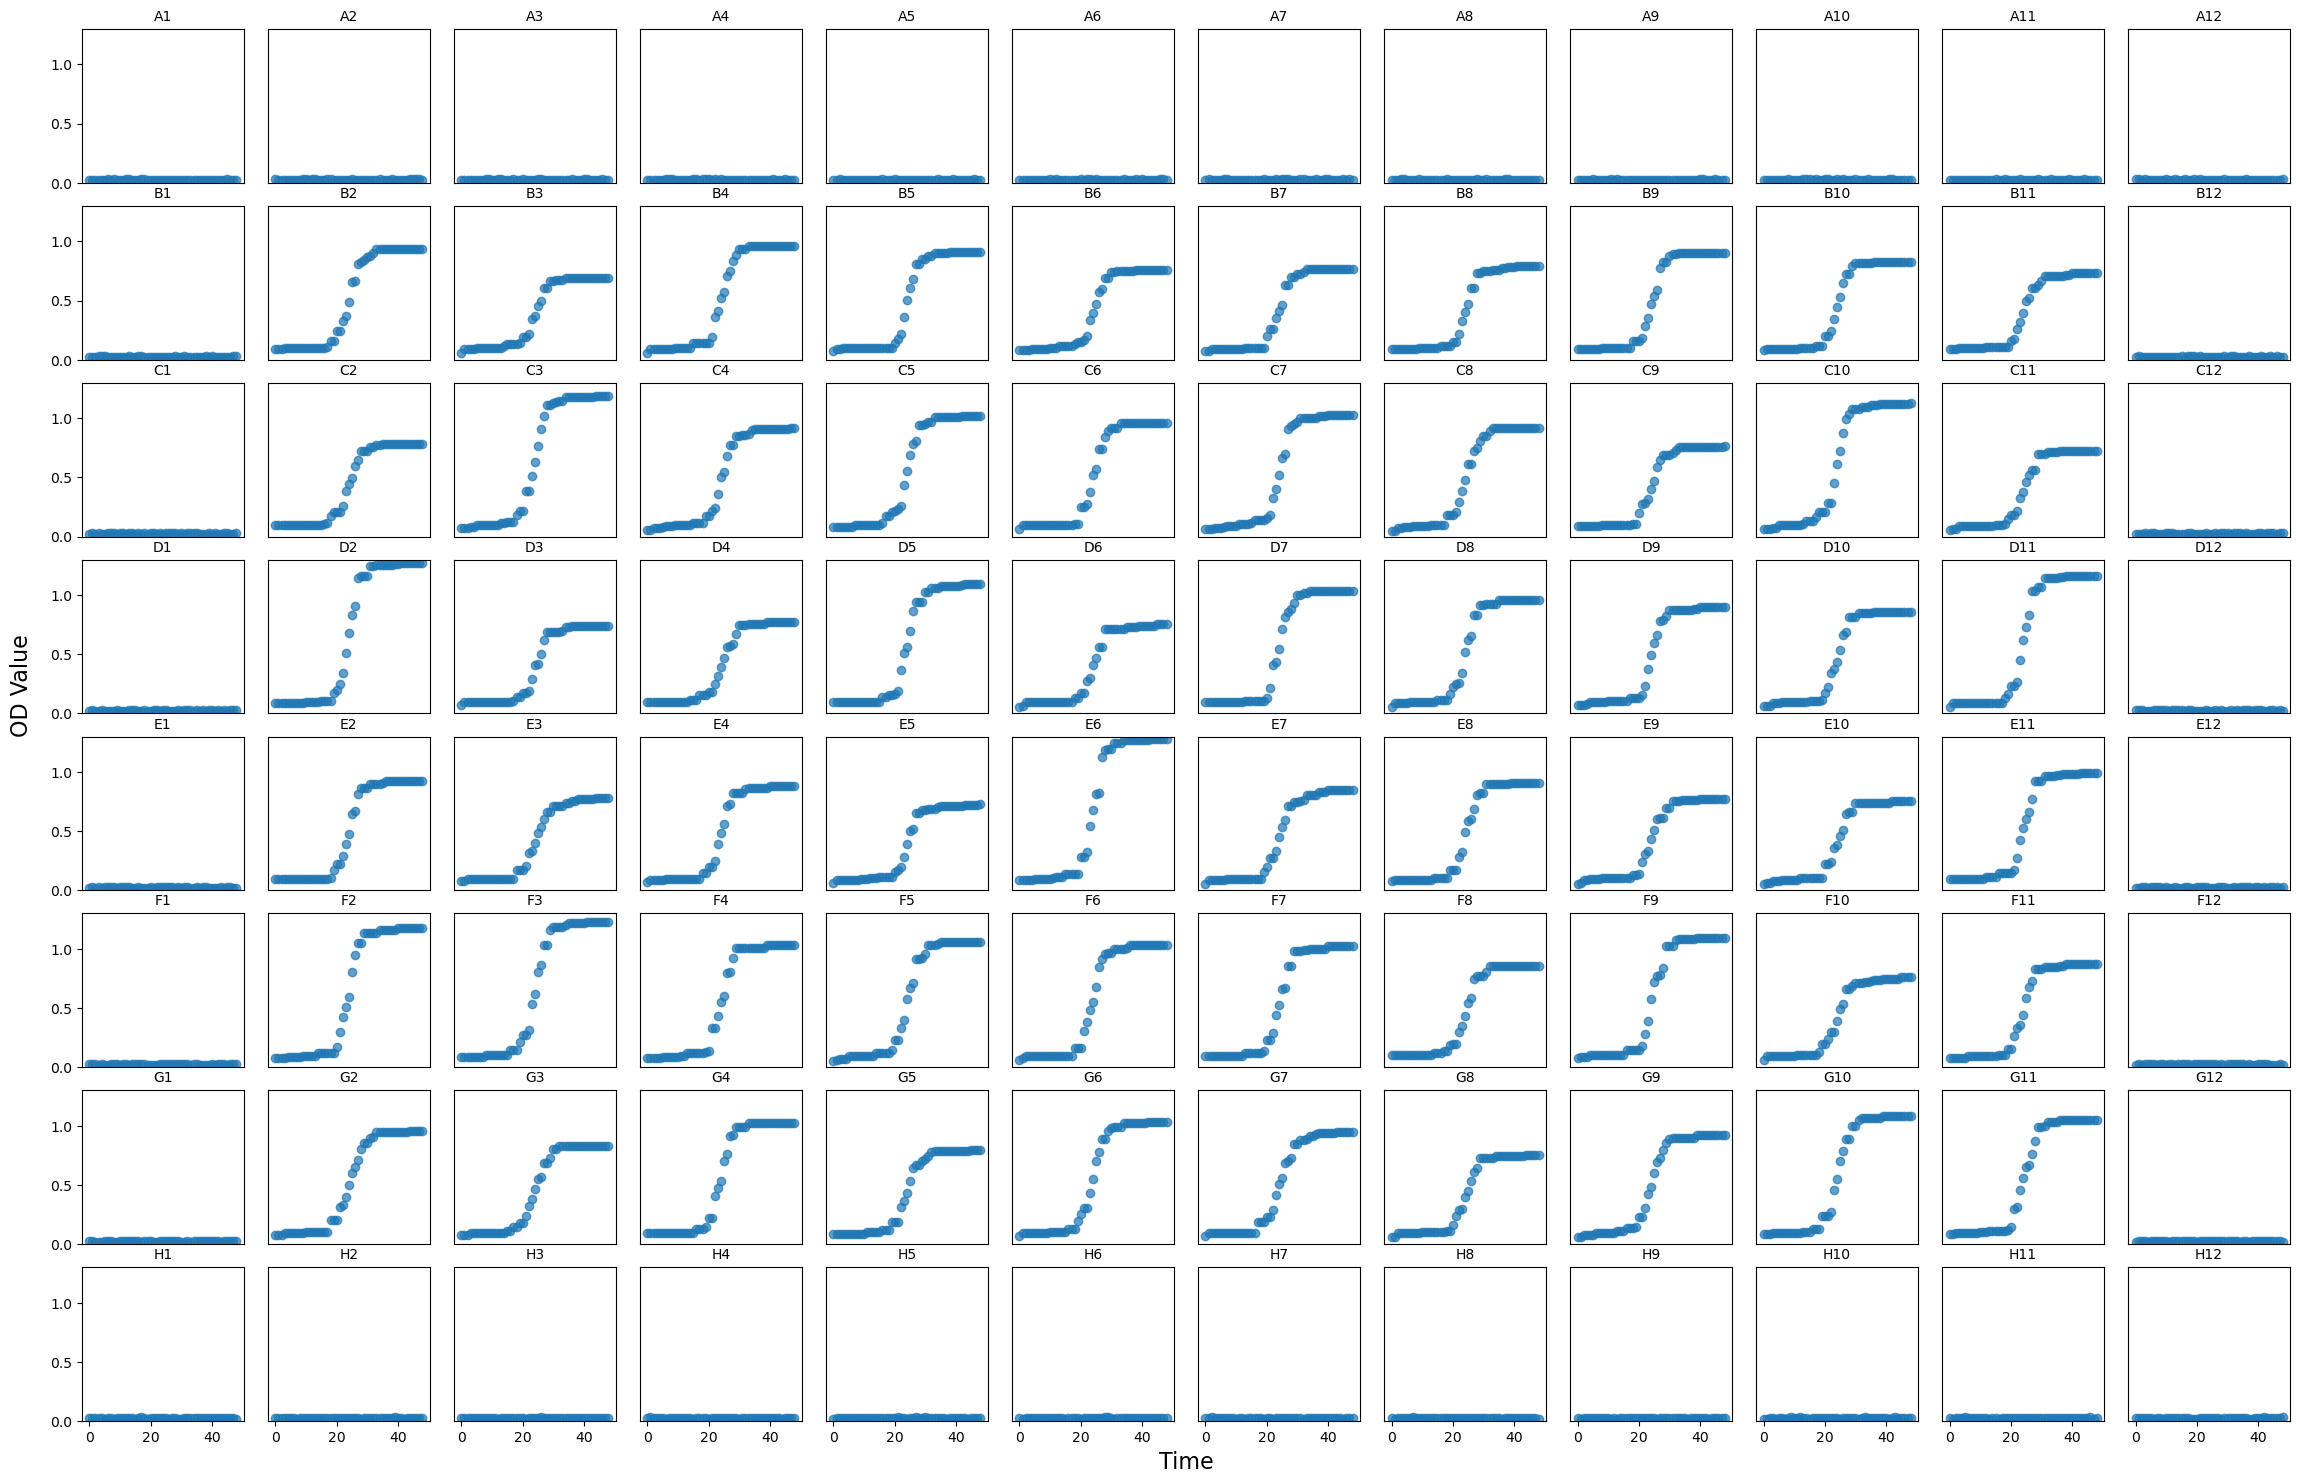

In [4]:
num_rows = 8
num_cols = 12  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16))  
axes = axes.flatten()

for i, column in enumerate(data.columns):
    ax = axes[i]
    ax.scatter(range(len(data)), data[column], alpha=0.7)
    ax.set_title(column, fontsize=10)
    ax.set_ylim(0, 1.3)
    
    if i < num_cols * (num_rows - 1):  
        ax.xaxis.set_visible(False)
    if i % num_cols != 0:  
        ax.yaxis.set_visible(False)
        
fig.text(0.54, 0.05, 'Time', ha='center', fontsize=16)  
fig.text(0.05, 0.54, 'OD Value', va='center', rotation='vertical', fontsize=16) 

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.08, right=1, wspace=0.15, hspace=0.15) 
plt.savefig("./result/Growth Curves.pdf", bbox_inches="tight")
plt.show()

In [5]:
valid_wells = [
    "B2","B3","B4","B5","B6","B7","B8","B9","B10","B11",
    "C2","C3","C4","C5","C6","C7","C8","C9","C10","C11",
    "D2","D3","D4","D5","D6","D7","D8","D9","D10","D11",
    "E2","E3","E4","E5","E6","E7","E8","E9","E10","E11",
    "F2","F3","F4","F5","F6","F7","F8","F9","F10","F11",
    "G2","G3","G4","G5","G6","G7","G8","G9","G10","G11"
]

background_wells = [col for col in data.columns if col not in valid_wells]
background = data[background_wells].mean().mean()

adjusted_data = data.copy()
adjusted_data[adjusted_data.columns] -= background
adjusted_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-0.002940,0.003069,0.001885,0.000825,0.002439,-0.000632,0.002073,0.000493,0.000953,0.002884,...,0.003910,0.002241,-0.005016,0.000789,-0.002625,0.003527,-0.002068,-0.004391,0.000418,-0.003794
0.5,-0.001159,-0.002449,0.000302,0.000514,0.001945,0.002585,0.004431,0.000183,-0.003158,-0.004329,...,0.003587,0.004606,-0.000295,-0.004361,-0.001510,-0.004912,-0.004801,-0.004822,-0.004496,-0.000494
1.0,0.002495,-0.000050,-0.002676,-0.004855,0.003211,-0.004774,-0.001494,0.000095,0.000099,-0.004727,...,0.000129,-0.000990,0.004063,0.003113,0.004791,-0.002182,0.003029,0.002862,0.000034,-0.003677
1.5,-0.002777,-0.004617,-0.004388,0.000846,-0.004305,-0.000194,0.000625,0.002997,-0.004801,-0.001498,...,-0.002156,0.001818,0.001024,0.002583,0.003422,0.004283,-0.002802,0.000303,0.004525,0.002673
2.0,0.002738,-0.003196,-0.000826,-0.001661,0.002460,-0.004846,-0.003443,0.004068,0.002546,-0.002966,...,0.000307,-0.003440,0.002375,-0.003313,0.004130,-0.001075,0.000121,-0.004273,0.000433,-0.001772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.0,0.001574,0.003845,-0.004154,-0.004817,0.002377,0.002064,-0.000275,-0.001693,0.002473,-0.004611,...,0.002556,-0.004941,-0.004651,0.001788,-0.000042,-0.003529,-0.002035,0.002046,0.000157,0.004514
22.5,0.003681,0.004929,-0.004864,0.003824,-0.003474,-0.002099,0.003330,0.002391,0.004668,0.000501,...,0.000283,-0.000212,-0.002526,-0.001009,-0.004304,0.001737,-0.003356,-0.001053,-0.003761,-0.000873
23.0,0.002852,0.003000,0.003513,-0.001482,0.004576,0.003023,0.001234,-0.003855,-0.002810,-0.000971,...,0.003659,0.004240,-0.003892,0.001776,-0.003477,-0.000501,-0.002245,0.002155,0.004764,-0.003547


In [ ]:
adjusted_data.to_csv("./result/adjusted_data.csv")

In [6]:
results = []

for well in valid_wells:
    moving_avg = adjusted_data[well].rolling(window=3, center=True).mean()

    maxOD_value = moving_avg.max()

    results.append({"Well": well, "MaxOD_Value": maxOD_value})

maxOD_data = pd.DataFrame(results)
maxOD_data.to_csv("./result/maxOD_data.csv")
maxOD_data

,Well,MaxOD_Value
0,B2,0.908596
1,B3,0.669068
2,B4,0.938693
3,B5,0.886719
4,B6,0.734472
...,...,...
55,G7,0.921982
56,G8,0.727103
57,G9,0.899827
58,G10,1.053782


In [7]:
results = []
time_interval = 0.5  
lag_value = 0.1

for well in valid_wells:
    valid = adjusted_data[well] >= lag_value
    series = adjusted_data[well][valid]

    log_vals = np.log(series)
    slopes = np.gradient(log_vals, time_interval) 
    slopes = pd.Series(slopes).rolling(3, center=True).mean()
    maxRate_value = slopes.max()

    results.append((well, maxRate_value))

maxRate_data = pd.DataFrame(results, columns=["Well", "MaxRate_Value"])
maxRate_data.to_csv("./result/maxRate_data.csv", index=False)
maxRate_data

,Well,MaxRate_Value
0,B2,0.500614
1,B3,0.500307
2,B4,0.762389
3,B5,0.763220
4,B6,0.623778
...,...,...
55,G7,0.530210
56,G8,0.581312
57,G9,0.514236
58,G10,0.638064
